In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
test_data = pd.read_csv("dataset-of-00s.csv")
print(test_data.dtypes)

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object


In [4]:
simplified = test_data[ ['track', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence'] ]
print(simplified.head(5))

                      track  danceability  loudness  speechiness  \
0                 Lucky Man         0.578    -7.270       0.0289   
1            On The Hotline         0.704    -5.477       0.1830   
2        Clouds Of Dementia         0.162    -3.009       0.0473   
3  Heavy Metal, Raise Hell!         0.188    -3.745       0.1660   
4           I Got A Feelin'         0.630    -4.353       0.0275   

   acousticness  instrumentalness  valence  
0      0.368000           0.00000    0.532  
1      0.018500           0.00000    0.688  
2      0.000111           0.00457    0.300  
3      0.000007           0.07840    0.333  
4      0.363000           0.00000    0.631  


,danceability,valence
danceability,0.036101,0.028606
valence,0.028606,0.064804


<Figure size 432x288 with 0 Axes>

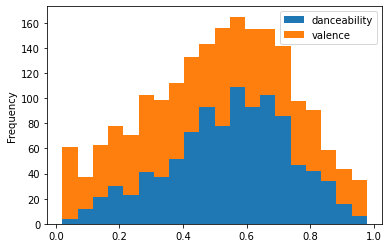

<Figure size 432x288 with 0 Axes>

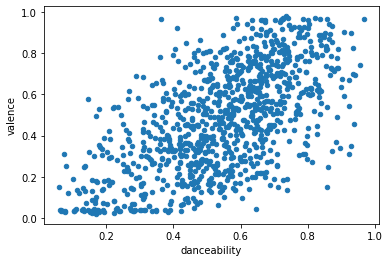

In [5]:
plt.figure()
dance = simplified[['danceability', 'valence']]
dance.iloc[:1000].plot.hist(stacked=True,bins=20)

plt.figure()
dance.iloc[:1000].plot.scatter(x="danceability", y='valence')

dance.cov()

In [65]:
print("COVARIANCE")
simplified.cov()

COVARIANCE


,danceability,loudness,speechiness,acousticness,instrumentalness,valence
danceability,0.036101,0.283866,0.002974,-0.010381,-0.019243,0.028606
loudness,0.283866,26.035948,0.046751,-1.036241,-0.679418,0.436586
speechiness,0.002974,0.046751,0.009024,-0.001667,-0.003537,0.003577
acousticness,-0.010381,-1.036241,-0.001667,0.087919,0.022835,-0.014137
instrumentalness,-0.019243,-0.679418,-0.003537,0.022835,0.090873,-0.025690
valence,0.028606,0.436586,0.003577,-0.014137,-0.025690,0.064804


In [66]:
corelated = simplified.corr()
corelated

,danceability,loudness,speechiness,acousticness,instrumentalness,valence
danceability,1.000000,0.292798,0.164758,-0.184268,-0.335961,0.591426
loudness,0.292798,1.000000,0.096448,-0.684910,-0.441705,0.336110
speechiness,0.164758,0.096448,1.000000,-0.059198,-0.123527,0.147927
acousticness,-0.184268,-0.684910,-0.059198,1.000000,0.255473,-0.187287
instrumentalness,-0.335961,-0.441705,-0.123527,0.255473,1.000000,-0.334772
valence,0.591426,0.336110,0.147927,-0.187287,-0.334772,1.000000


In [67]:
corr_upper_bound = 0.5
corelated[ 1 -abs(corelated)  < corr_upper_bound] #filtering for correlation above 0.6

,danceability,loudness,speechiness,acousticness,instrumentalness,valence
danceability,1.000000,NaN,NaN,NaN,NaN,0.591426
loudness,NaN,1.00000,NaN,-0.68491,NaN,NaN
speechiness,NaN,NaN,1.0,NaN,NaN,NaN
acousticness,NaN,-0.68491,NaN,1.00000,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,1.0,NaN
valence,0.591426,NaN,NaN,NaN,NaN,1.000000


In [68]:
simplified['loudness'].cov(simplified['acousticness'])

-1.0362412915101666

<AxesSubplot:xlabel='loudness', ylabel='acousticness'>

<Figure size 432x288 with 0 Axes>

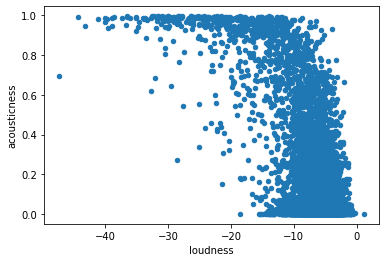

In [72]:
plt.figure()
simplified.plot.scatter(x='loudness', y='acousticness')